In [2]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv', delimiter=",")

In [5]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [6]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [66]:
X=df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [67]:
from sklearn import preprocessing
le_sex=preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1]=le_sex.transform(X[:,1])

le_BP=preprocessing.LabelEncoder()
le_BP.fit(['LOW','NORMAL','HIGH'])
X[:,2]=le_BP.transform(X[0:,2])

le_chol=preprocessing.LabelEncoder()
le_chol.fit(['NORMAL','HIGH'])
X[:,3]=le_chol.transform(X[0:,3])

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [68]:
y=df['Drug']

In [69]:
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [72]:
print("training set shape",X_train.shape)
print("testing set shape",X_test.shape)

training set shape (160, 5)
testing set shape (40, 5)


In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
drugtree = DecisionTreeClassifier(criterion="entropy")
drugtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [75]:
drug_pred=drugtree.predict(X_test)

In [76]:
print(drug_pred[0:10])
print(y_test[0:10])

['drugY' 'drugY' 'drugY' 'drugY' 'drugC' 'drugX' 'drugY' 'drugY' 'drugY'
 'drugA']
11     drugY
99     drugY
128    drugY
175    drugY
1      drugC
111    drugX
90     drugY
177    drugY
88     drugY
187    drugA
Name: Drug, dtype: object


In [77]:
from sklearn import metrics

In [78]:
print("the Accuracy of the model is ",metrics.accuracy_score(drug_pred,y_test))

the Accuracy of the model is  0.95


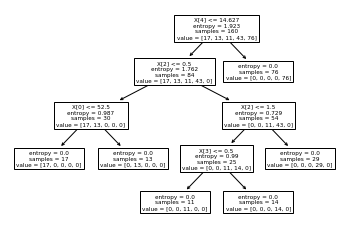

In [81]:
import sklearn.tree as tree
tree.plot_tree(drugtree)
plt.show()